In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.model_selection import*
from sklearn import pipeline
from sklearn.preprocessing import*
from sklearn.decomposition import*
from sklearn.manifold import*
from sklearn.ensemble import*
from sklearn.metrics import*
from sklearn import*
import catboost as ctb
import lightgbm as lgb
plt.rcParams['figure.figsize'] = (20, 15)
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
import re
from tqdm import*
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import*
from tensorflow.keras.layers import*
import datetime as dt
import gc
from time import*
from bayes_opt import *
import h2o
from h2o.automl import H2OAutoML
plt.style.use('ggplot')
tqdm.pandas()

In [2]:
#import datasets

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
train_idx=df_train.shape[0]

In [5]:
#Train+test for more eazy eda and features

In [6]:
df = pd.concat([df_train.drop('SalePrice',axis=1),df_test])
print(df.shape)
df.head()

(2919, 80)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [7]:
targ = df_train['SalePrice']


In [8]:
df.index= df.pop('Id')

In [9]:
#check objects to find ones that can't be obj
df.select_dtypes(include='O')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2916,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


In [10]:
#check non objects to find ones that can be obj
df.select_dtypes(exclude='O')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,548.0,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,460.0,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,608.0,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,642.0,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,836.0,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,6,2006
2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,286.0,0,24,0,0,0,0,0,4,2006
2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,576.0,474,0,0,0,0,0,0,9,2006


In [11]:
#binar class for rare items
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  if df[column].quantile(0.9)==0:
    df[column] = df[column].apply(lambda x: 0 if x==0 else 1).astype('O')
    print(j,column)

14LowQualFinSF
17BsmtHalfBath
303SsnPorch
31ScreenPorch
32PoolArea
33MiscVal



In [12]:
# to obj low var int
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  if df[column].value_counts().shape[0]<20:
    df[column] = df[column].astype('O')
    print(j,column)

0MSSubClass
3OverallQual
4OverallCond
15BsmtFullBath
16FullBath
17HalfBath
18BedroomAbvGr
19KitchenAbvGr
20TotRmsAbvGrd
21Fireplaces
23GarageCars
28MoSold
29YrSold



In [13]:
#EDA non- object

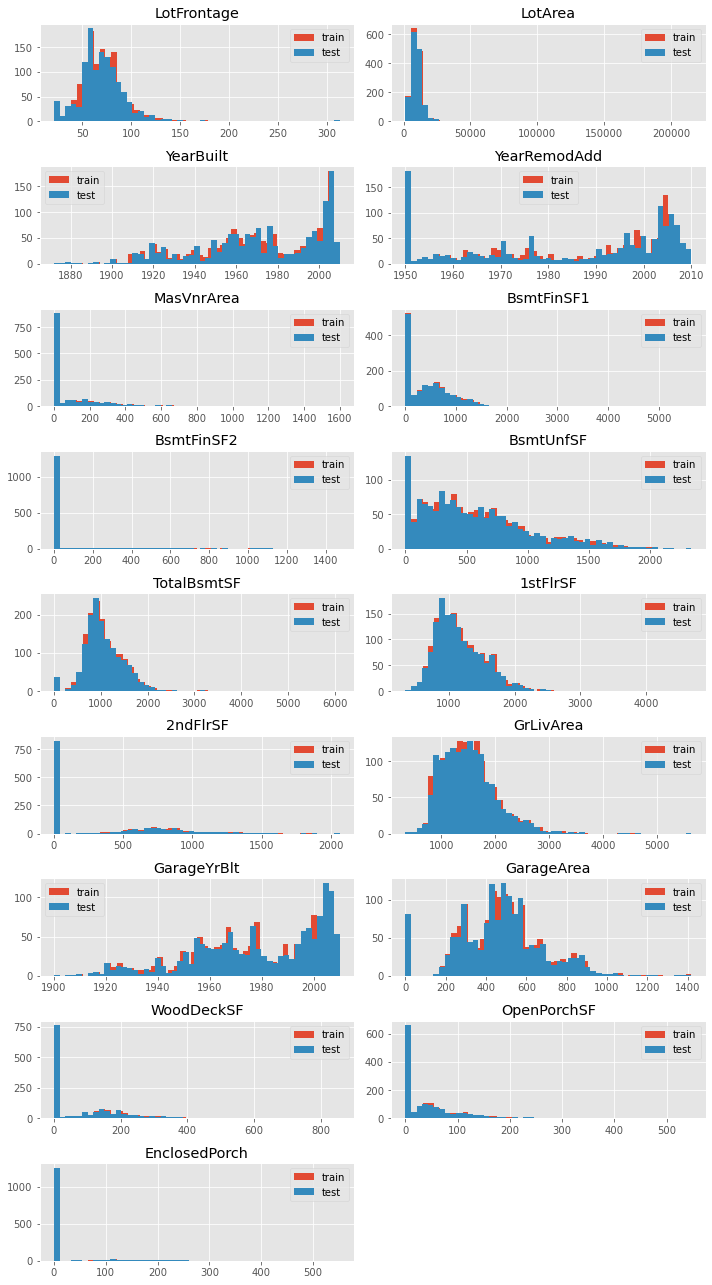

In [14]:
fig = plt.figure(figsize=(10,15*2.5))
for j,column in tqdm_notebook(enumerate(df.select_dtypes(exclude='O').columns)):
  ax=fig.add_subplot(19,2,j+1)
  ax.set_title(column)
  df[column][:train_idx].hist(bins=50,ax=ax)
  df[column][:train_idx].hist(bins=51,ax=ax)
  plt.legend(['train','test'])
  plt.tight_layout()

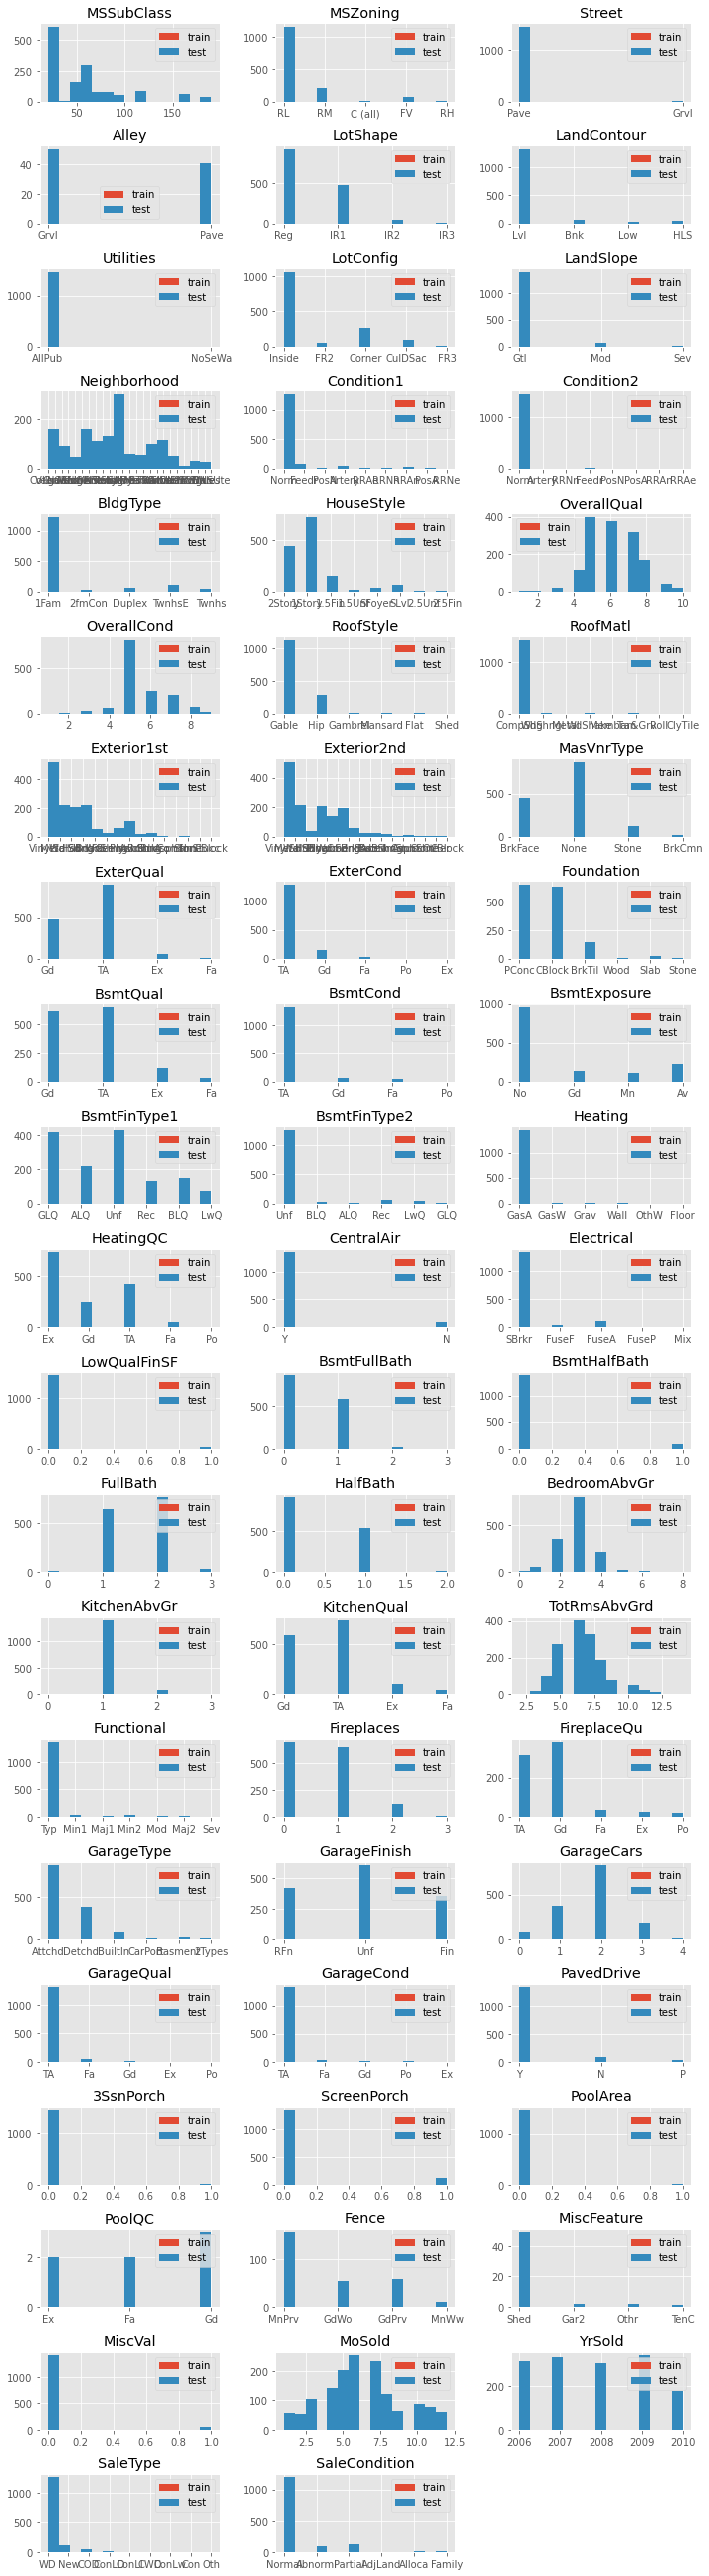

In [15]:
fig = plt.figure(figsize=(10,15*2.5))
for j,column in tqdm_notebook(enumerate(df.select_dtypes(include='O').columns)):
  ax=fig.add_subplot(22,3,j+1)
  ax.set_title(column)
  df[column][:train_idx].hist(bins=15,ax=ax)
  df[column][:train_idx].hist(bins=15,ax=ax)
  plt.legend(['train','test'])
  plt.tight_layout()

In [16]:
#Filling_na's

In [17]:
for i in ['PoolQC','MiscFeature','Alley','Fence','FireplaceQu']:
 df[i]=df[i].fillna('none')

In [18]:
for i in [x for x in df if df[x].isna().any()==True]:
  if df[i].dtype == 'O': 
    df[i] = df.groupby(['Neighborhood'])[i].apply(lambda x: x.fillna((x.mode())))
    df[i]=df[i].fillna(df[i].mode()[0])
  else: df[i]=impute.KNNImputer().fit_transform(np.array(df[i]).reshape(-1,1))

In [19]:
#FE on num

In [20]:
df.shape

(2919, 79)

In [21]:
df['sec_floor'] = df['2ndFlrSF'].apply(lambda x: 0 if x==0 else 1).astype('O')

In [22]:
df['Bmnt_bath'] = (df['BsmtFullBath']+df['BsmtHalfBath']*0.5).astype('O')
df['Bmnt_bath'] = df['Bmnt_bath'].astype('O')

In [23]:
df['TotalFlrSF'] = df[['1stFlrSF','2ndFlrSF','TotalBsmtSF']].sum(axis=1)

In [24]:
df.GarageYrBlt = df.GarageYrBlt.astype('O')

In [25]:
df['CapRepear'] = df['YearRemodAdd']-df['YearBuilt']
df['CapRepear']=df['CapRepear'].apply(lambda x: 1 if x > 0 else 0)
df['CapRepear'] = df['CapRepear'].astype('O')

In [26]:
df['decade']=pd.qcut(df['YearBuilt'],10)
df['decade'] = df['decade'].factorize()[0].astype('O')

In [27]:
df_mani = df.copy()

In [28]:
from collections import defaultdict  as dd

In [29]:
d = dd(LabelEncoder)

In [30]:
df_mani[df_mani.select_dtypes('O').columns]=df_mani.select_dtypes('O').apply(lambda x : d[x.name].fit_transform(x))

In [31]:
df_lle = pd.DataFrame(manifold.LocallyLinearEmbedding(n_components=3).fit_transform(df_mani),columns=['x','y','z'])

In [32]:
optics_lle = cluster.OPTICS(min_cluster_size=300).fit(df_lle)

In [33]:
dbscan_lle = cluster.DBSCAN().fit(df_lle)

In [34]:
kmeans_lle= cluster.KMeans(5).fit(df_lle)

In [35]:
birch_lle = cluster.Birch().fit(df_lle)

In [36]:
spec_lle = cluster.SpectralClustering().fit(df_lle)

In [37]:
em=mixture.BayesianGaussianMixture(init_params='random',covariance_type='full',n_components=4)

In [38]:
em_lle = em.fit(df_lle)

In [39]:
px.scatter_3d(df_lle.assign(label=em_lle.predict(df_lle)),x='x',y='y',z='z',color='label')

In [40]:
for i in [optics_lle,dbscan_lle,kmeans_lle,birch_lle,spec_lle]:
  df[i.__class__.__name__] = i.labels_.astype('O')

In [41]:
df[em_lle.__class__.__name__] = em.predict(df_lle).astype('O')

In [42]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,Bmnt_bath,TotalFlrSF,CapRepear,decade,OPTICS,DBSCAN,KMeans,Birch,SpectralClustering,BayesianGaussianMixture
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,none,Reg,Lvl,AllPub,Inside,...,1,2566.0,0,0,0,0,0,0,2,0
2,20,RL,80.0,9600,Pave,none,Reg,Lvl,AllPub,FR2,...,0.5,2524.0,0,1,0,0,0,0,0,1
3,60,RL,68.0,11250,Pave,none,IR1,Lvl,AllPub,Inside,...,1,2706.0,1,0,0,0,2,0,0,1
4,70,RL,60.0,9550,Pave,none,IR1,Lvl,AllPub,Corner,...,1,2473.0,1,2,0,0,0,0,2,0
5,60,RL,84.0,14260,Pave,none,IR1,Lvl,AllPub,FR2,...,1,3343.0,0,0,0,0,2,0,0,1


In [43]:
df.loc[:,df_train.filter(regex='Bath').columns]=df.filter(regex='Bath').apply(lambda x: x.astype('O'),result_type='expand')

In [44]:
obj_cols=df.select_dtypes('O').columns
num_cols=df.select_dtypes(exclude='O').columns

In [45]:
dff = df.copy()

In [46]:
for obj in tqdm_notebook(obj_cols):
    for var in ['mean','median','std']:
        temp = dff.groupby(obj)[num_cols].transform(var)
        temp.columns = [f'{i}_{var}_by_{obj}' for i in num_cols]
        dff = pd.concat([dff,temp],axis=1)

In [47]:
df.shape

(2919, 90)

In [48]:
dff.shape

(2919, 3978)

In [49]:
low_var =[]
for i in dff.columns:
  most_comm = dff[i].value_counts().iloc[0]
  if most_comm/len(dff) > 0.995:
    low_var.append(i)

In [50]:
pd.set_option('use_inf_as_na', True)

In [51]:
df_o = dff.drop(low_var,axis=1)

In [52]:
df_o.isna().sum()[df_o.isna().sum()>0]

LotFrontage_std_by_MSSubClass              1
LotArea_std_by_MSSubClass                  1
YearBuilt_std_by_MSSubClass                1
YearRemodAdd_std_by_MSSubClass             1
MasVnrArea_std_by_MSSubClass               1
                                          ..
GarageArea_std_by_SpectralClustering       2
WoodDeckSF_std_by_SpectralClustering       2
OpenPorchSF_std_by_SpectralClustering      2
EnclosedPorch_std_by_SpectralClustering    2
TotalFlrSF_std_by_SpectralClustering       2
Length: 234, dtype: int64

In [54]:
si=impute.SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [55]:
df_o = si.fit_transform(df_o)

In [114]:
def fixing_skewness(df):

    from scipy.stats import skew
    from scipy.special import boxcox1p
    from scipy.stats import boxcox_normmax
    
    num_feats = df.dtypes[df.dtypes != "O"].index

    skewed_feats = df[num_feats].apply(lambda x: skew(x))
    high_skew = skewed_feats[abs(skewed_feats) > 0.5]
    skewed_features = high_skew.index
    for feat in tqdm_notebook(skewed_features):
      try:
        #print('Before',feat,df[feat].mean())
        df[feat] = boxcox1p(df[feat], boxcox_normmax(df[feat] + 1))
        if df[feat]
      except:
          pass


fixing_skewness(df_o)
#fixing_skewness(dff)


for i in dff:
  if dff[i].dtype=='O':
    dff[i]=LabelEncoder().fit_transform(dff[i]).astype('O')

In [243]:
d_ = dd(LabelEncoder)

In [244]:
for i in tqdm_notebook(df_o):
  if df_o[i].dtype=='O':
    df_o[i]=d_[i].fit_transform(df_o[i])

In [245]:
df_train = df_o[:train_idx]
df_test = df_o[train_idx:]
targ = np.log1p(targ)

In [246]:
df_o

,MSSubClass,MSZoning,LotFrontage,LotArea,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,...,TotalBsmtSF_max_by_BayesianGaussianMixture,1stFlrSF_max_by_BayesianGaussianMixture,2ndFlrSF_max_by_BayesianGaussianMixture,GrLivArea_max_by_BayesianGaussianMixture,GarageCars_max_by_BayesianGaussianMixture,GarageArea_max_by_BayesianGaussianMixture,WoodDeckSF_max_by_BayesianGaussianMixture,OpenPorchSF_max_by_BayesianGaussianMixture,EnclosedPorch_max_by_BayesianGaussianMixture,TotalFlrSF_max_by_BayesianGaussianMixture
Id,,,,,,,,,,,,,,,,,,,,,
1,60,3,65.0,8450,2,3,3,4,0,5,...,3206.0,3228,1788,3228,5.0,1348.0,736,523,364,6428.0
2,20,3,80.0,9600,2,3,3,2,0,24,...,3206.0,3228,1788,3228,5.0,1348.0,736,523,364,6428.0
3,60,3,68.0,11250,2,0,3,4,0,5,...,6110.0,5095,2065,5642,4.0,1488.0,1424,742,1012,11752.0
4,70,3,60.0,9550,2,0,3,0,0,6,...,3206.0,3228,1788,3228,5.0,1348.0,736,523,364,6428.0
5,60,3,84.0,14260,2,0,3,2,0,15,...,6110.0,5095,2065,5642,4.0,1488.0,1424,742,1012,11752.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,4,21.0,1936,2,3,3,4,0,10,...,2158.0,2196,1629,3005,3.0,984.0,468,254,280,4381.0
2916,160,4,21.0,1894,2,3,3,4,0,10,...,2158.0,2196,1629,3005,3.0,984.0,468,254,280,4381.0
2917,20,3,160.0,20000,2,3,3,4,0,11,...,6110.0,5095,2065,5642,4.0,1488.0,1424,742,1012,11752.0


In [ ]:
#sfm = feature_selection.SelectFromModel(linear_model.LassoCV(alphas=[0.1,0.05,0.005,0.0005,0.00005,0.000005], cv=5)).fit(df_train,targ)

In [ ]:
#df_cut=pd.DataFrame(sfm.transform(df_o_train.values))

In [247]:
cat_feats = [df_o.columns.get_loc(i) for i in df_o.select_dtypes('O')]

In [248]:
df_o.isna().sum().sum()

0

In [249]:
data.shape

(1460, 6570)

In [250]:
targ.shape

(1460,)

In [251]:
x,xval,y,yval = train_test_split(df_train,targ, train_size=0.8, random_state=11)

In [208]:

cat = ctb.CatBoostRegressor(early_stopping_rounds=500
                            ,random_state=11, iterations=2000)

In [209]:
train_pool = ctb.Pool(x,y,cat_features=cat_feats)
val_pool = ctb.Pool(xval,yval,cat_features=cat_feats)

In [210]:
start=time()
cat.fit(train_pool,
        eval_set=val_pool,
        metric_period=200)
print(time()-start)

Learning rate set to 0.03081
0:	learn: 76170.0273051	test: 84800.3107929	best: 84800.3107929 (0)	total: 52.4ms	remaining: 1m 44s
200:	learn: 17614.8757170	test: 33807.7784757	best: 33807.7784757 (200)	total: 7.97s	remaining: 1m 11s
400:	learn: 11792.5250399	test: 31460.4011932	best: 31460.4011932 (400)	total: 16s	remaining: 1m 3s
600:	learn: 8607.0905511	test: 31040.3623940	best: 31029.4204088 (592)	total: 23.9s	remaining: 55.6s
800:	learn: 6490.9523205	test: 30835.3564964	best: 30835.3564964 (800)	total: 31.6s	remaining: 47.3s
1000:	learn: 5087.2363813	test: 30761.7167199	best: 30758.8104122 (994)	total: 39.6s	remaining: 39.6s
1200:	learn: 4088.6934467	test: 30737.5675641	best: 30726.0180177 (1172)	total: 48s	remaining: 31.9s
1400:	learn: 3172.4019385	test: 30723.1550567	best: 30718.5676361 (1391)	total: 57.7s	remaining: 24.7s
1600:	learn: 2502.1513767	test: 30700.2166708	best: 30699.9202620 (1599)	total: 1m 7s	remaining: 16.9s
1800:	learn: 2032.6266293	test: 30692.8620425	best: 30683

In [252]:
l_data_cat = lgb.Dataset(x,y,categorical_feature=cat_feats,free_raw_data=False)
val_l_data_cat = lgb.Dataset(xval,yval,categorical_feature=cat_feats,free_raw_data=False)

In [212]:
params = {
          'metric':'rmse',
 'max_depth': -1,
 'n_jobs': -1,
 'random_state': 1,
 'silent': False}

In [214]:
start=time()
lgb_reg_cat = lgb.train(params=params,train_set=l_data_cat,
                        valid_sets=val_l_data_cat,
                        num_boost_round=20000,
                        verbose_eval=500,
                        early_stopping_rounds=2000
                        
                        )
print(time()-start)

Training until validation scores don't improve for 2000 rounds
[500]	valid_0's rmse: 33694.8
[1000]	valid_0's rmse: 33719.7
[1500]	valid_0's rmse: 33723.6
[2000]	valid_0's rmse: 33724.5
Early stopping, best iteration is:
[127]	valid_0's rmse: 33069
53.890525579452515


In [217]:
pd.DataFrame(cat.feature_importances_,index=x.columns).sort_values(0,ascending=False)

,0
TotalFlrSF,16.758548
BsmtUnfSF_max_by_OverallQual,3.822751
GrLivArea,2.594648
GarageCars_mean_by_OverallQual,2.326484
GrLivArea_median_by_Neighborhood,1.501630
...,...
LotArea_median_by_BedroomAbvGr,0.000000
YearBuilt_median_by_BedroomAbvGr,0.000000
TotalBsmtSF_min_by_RoofStyle,0.000000
MasVnrArea_median_by_BedroomAbvGr,0.000000


In [218]:
pd.DataFrame(lgb_reg_cat.feature_importance(),index=x.columns).sort_values(0,ascending=False)[:10]


,0
TotalFlrSF,216
GarageArea,118
LotArea,117
GrLivArea,110
BsmtFinSF1,105
LotFrontage,97
BsmtUnfSF,93
TotalBsmtSF,86
OpenPorchSF,84
1stFlrSF,63


In [222]:
targ.shape

(1460,)

In [223]:
df_o.shape

(2919, 5113)

In [253]:
X_train=df_train # analysing data
y_train=targ #analysing target
categorical_features=[] #categorical features in set
#num of parametrs must match in lgb_eval & optimisition
def lgb_eval(num_leaves,max_depth,lambda_l2,lambda_l1,min_child_samples,
 #min_data_in_leaf,
 learning_rate):
    #parametrs for tuning
    params = {'objective':'regression',
              'metric':'rmse',
        "num_leaves" : int(num_leaves),
        "max_depth" : int(max_depth),
        "lambda_l2" : lambda_l2,
        "lambda_l1" : lambda_l1,
        "min_child_samples" : int(min_child_samples),
        #'min_data_in_leaf': int(min_data_in_leaf),
        "learning_rate" : learning_rate,
        "verbosity" : 1,
        'n_estimators':3000}
    lgtrain = lgb.Dataset(X_train, y_train)
    #testing feature, almost always some kind of cv
    cv_result = lgb.cv(params,
                       lgtrain,
                       num_boost_round=5000,
                       early_stopping_rounds=500,
                       nfold=3,stratified=False)
    return -cv_result['rmse-mean'][-1]

In [254]:
lgbBO = BayesianOptimization(lgb_eval, {'num_leaves': (0, 4000),
                                                'max_depth': (-1, 63),
                                                'lambda_l2': (0.0, 8),
                                                'lambda_l1': (0.0, 8),
                                                'min_child_samples': (50, 10000),
                                                #'min_data_in_leaf': (100, 2000),
                                                'learning_rate':(0.000005,0.1)
                                                })

lgbBO.maximize(n_iter=15, init_points=5)

|   iter    |  target   | lambda_l1 | lambda_l2 | learni... | max_depth | min_ch... | num_le... |
-------------------------------------------------------------------------------------------------
| 1 |-1.975e+0 | 0.1667 | 2.995 | 0.04668 | 18.74 | 7.727e+0 | 3.112e+0 |
| 2 |-1.975e+0 | 3.27 | 1.745 | 0.09717 | 59.39 | 8.385e+0 | 345.6 |
| 3 |-1.975e+0 | 3.507 | 3.271 | 0.09996 | 15.58 | 9.99e+03 | 1.128e+0 |
| 4 |-1.975e+0 | 2.581 | 5.694 | 0.000282 | 10.4 | 1.685e+0 | 1.622e+0 |
| 5 |-1.975e+0 | 4.313 | 6.704 | 0.08247 | 61.05 | 2.947e+0 | 2.116e+0 |


ValueError: array must not contain infs or NaNs

In [ ]:
cat_p = ctb.CatBoostRegressor(early_stopping_rounds=800
                            ,cat_features=cat_feats
                            ,random_state=11, iterations=10000)

In [ ]:
cat_p.fit(df_train,targ,metric_period=200)

Learning rate set to 0.007255
0:	learn: 0.3973828	total: 129ms	remaining: 21m 30s
200:	learn: 0.1926802	total: 25.5s	remaining: 20m 43s
400:	learn: 0.1359728	total: 50.1s	remaining: 19m 59s
600:	learn: 0.1156538	total: 1m 14s	remaining: 19m 21s
800:	learn: 0.1049639	total: 1m 38s	remaining: 18m 50s
1000:	learn: 0.0972290	total: 2m 2s	remaining: 18m 22s
1200:	learn: 0.0910601	total: 2m 27s	remaining: 17m 57s
1400:	learn: 0.0864112	total: 2m 51s	remaining: 17m 33s
1600:	learn: 0.0826432	total: 3m 16s	remaining: 17m 11s
1800:	learn: 0.0790673	total: 3m 41s	remaining: 16m 49s
2000:	learn: 0.0760110	total: 4m 7s	remaining: 16m 28s
2200:	learn: 0.0731380	total: 4m 32s	remaining: 16m 6s
2400:	learn: 0.0700154	total: 4m 58s	remaining: 15m 43s
2600:	learn: 0.0670734	total: 5m 23s	remaining: 15m 19s
2800:	learn: 0.0642323	total: 5m 48s	remaining: 14m 55s
3000:	learn: 0.0617020	total: 6m 13s	remaining: 14m 31s
3200:	learn: 0.0592607	total: 6m 38s	remaining: 14m 6s
3400:	learn: 0.0570170	total: 7m

In [ ]:
ss = pd.read_csv('/content/drive/My Drive/Colab Notebooks/HP/sample_submission.csv')

In [ ]:
pred=cat_p.predict(df_test)

In [ ]:
ss['SalePrice'] = np.expm1(pred)

In [ ]:
ss.to_csv(f'{df_o.shape[1]}k feats+ clustering',index=False)